In [1]:
import numpy as np
from matplotlib import pyplot as plt
from daphne import daphne
from evaluation_based_sampling import evaluate_program

In [2]:
def load_program(num):
    return daphne(['desugar', '-i', '../a2/programs/{}.daphne'.format(num)])

In [4]:
%matplotlib inline

## Program 1 ##

Mean of mu: 1.008



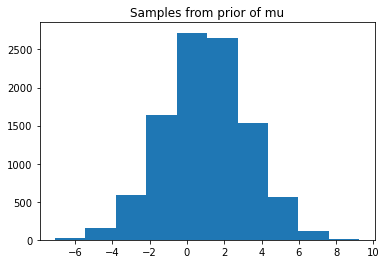

In [37]:
ast = load_program(1)
samples = []
for i in range(10000):
    samples.append(evaluate_program(ast).item())
print("Mean of mu: {:.3f}\n".format(np.mean(samples)))
plt.hist(samples, bins=10)
plt.title("Samples from prior of mu")
plt.show()

## Program 2

Mean of slope: -0.020
Mean of bias: 0.032



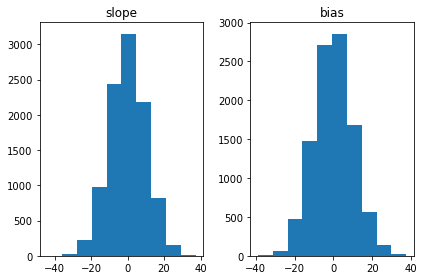

In [55]:
ast = load_program(2)
samples = []
for i in range(10000):
    samples.append(evaluate_program(ast).numpy().tolist())
samples = np.asarray(samples)

print("Mean of slope: {:.3f}".format(np.mean(samples[:, 0])))
print("Mean of bias: {:.3f}\n".format(np.mean(samples[:, 1])))

plt.subplot(1,2,1)
plt.hist(samples[:, 0], bins=10)
plt.title("slope")
plt.subplot(1,2,2)
plt.hist(samples[:, 1], bins=10)
plt.title("bias")
plt.tight_layout()
plt.show()


## Program 3

Mean of z_i's:
 1.0138 1.4191 1.4734 1.4778 1.4637 1.4799 1.4745 1.4762 1.4902 1.4672 1.4812 1.4752 1.4784 1.4698 1.4808 1.4817 1.4757


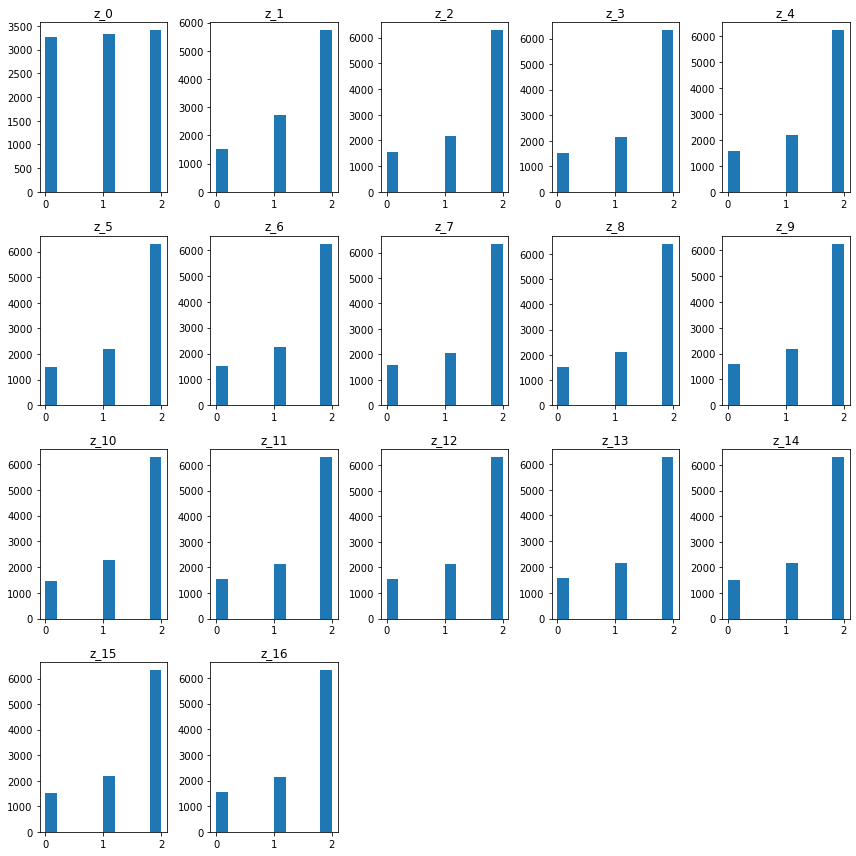

In [61]:
ast = load_program(3)
samples = []
for i in range(10000):
    samples.append(evaluate_program(ast).numpy().tolist())
samples = np.asarray(samples)

print("Mean of z_i's:\n", *np.mean(samples, axis=0, keepdims=False).tolist())

plt.figure(figsize=(12, 12))
for i in range(17):
    plt.subplot(4, 5, i+1)
    plt.hist(samples[:, i])
    plt.title("z_{}".format(i))
plt.tight_layout()
plt.show()

## Program 4

In [73]:
ast = load_program(4)
samples = {'W0': [], 'b0': [], 'W1': [], 'b1': []}
for i in range(10000):
    ret = evaluate_program(ast)
    samples['W0'].append(ret[0].numpy().reshape(10))
    samples['b0'].append(ret[1].numpy().reshape(10))
    samples['W1'].append(ret[2].numpy())
    samples['b1'].append(ret[3].numpy().reshape(10))
samples['W0'] = np.asarray(samples['W0'])
samples['b0'] = np.asarray(samples['b0'])
samples['W1'] = np.asarray(samples['W1'])
samples['b1'] = np.asarray(samples['b1'])

In [82]:
np.set_printoptions(threshold=np.inf, formatter={'float_kind': "{:.3f}".format})
print("Mean of W0:\n", np.mean(samples['W0'], axis=0, keepdims=False))
print("Mean of b0:\n", np.mean(samples['b0'], axis=0, keepdims=False))
print("Mean of W1:\n", np.mean(samples['W1'], axis=0, keepdims=False))
print("Mean of b1:\n", np.mean(samples['b1'], axis=0, keepdims=False))

Mean of W0:
 [-0.014 -0.024 -0.003 -0.013 0.012 0.001 -0.013 -0.011 -0.000 0.005]
Mean of b0:
 [-0.013 -0.004 -0.002 -0.001 -0.004 -0.005 0.005 0.005 0.006 -0.007]
Mean of W1:
 [[0.007 0.012 -0.020 0.005 -0.008 -0.005 0.010 -0.012 0.004 0.009]
 [0.006 -0.001 -0.027 -0.009 0.006 0.006 0.011 0.008 0.001 0.000]
 [-0.002 -0.013 0.007 0.002 -0.002 -0.011 -0.003 0.010 -0.013 -0.017]
 [0.004 0.012 0.007 0.010 -0.004 -0.001 -0.005 -0.016 0.001 -0.005]
 [0.012 -0.014 0.013 0.005 -0.009 -0.007 -0.001 -0.007 0.007 0.004]
 [0.006 0.017 0.005 0.003 0.012 0.005 -0.014 -0.003 -0.001 -0.010]
 [-0.020 0.024 0.008 0.002 -0.004 -0.003 0.018 -0.004 0.004 -0.011]
 [-0.003 -0.006 -0.002 -0.021 0.003 -0.006 -0.001 -0.019 0.009 -0.004]
 [0.000 0.003 -0.020 -0.014 -0.006 -0.006 -0.016 0.008 -0.014 -0.006]
 [-0.008 0.004 0.020 -0.003 -0.000 -0.004 0.004 0.003 -0.007 -0.003]]
Mean of b1:
 [0.000 -0.006 -0.014 0.002 -0.004 0.003 0.009 0.004 -0.004 -0.015]


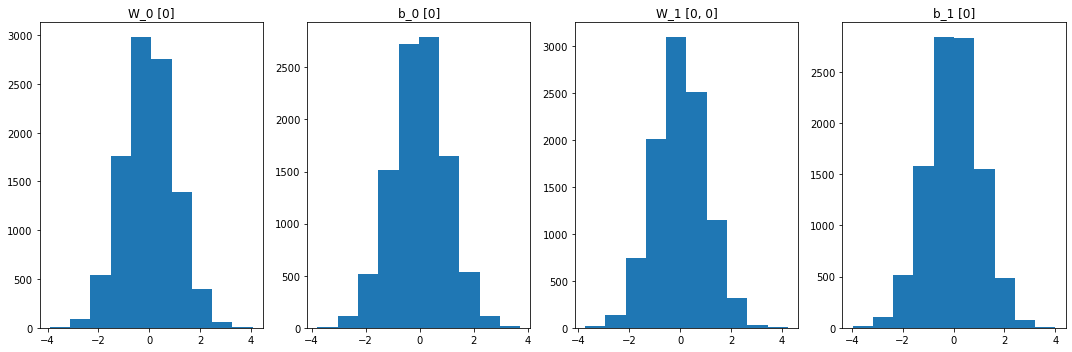

In [89]:
plt.figure(figsize=(15, 5))

plt.subplot(1,4,1)
plt.hist(samples['W0'][:, 0], bins=10)
plt.title("W_0 [0]")

plt.subplot(1,4,2)
plt.hist(samples['b0'][:, 0], bins=10)
plt.title("b_0 [0]")

plt.subplot(1,4,3)
plt.hist(samples['W1'][:, 0, 0], bins=10)
plt.title("W_1 [0, 0]")

plt.subplot(1,4,4)
plt.hist(samples['b1'][:, 0], bins=10)
plt.title("b_1 [0]")

plt.tight_layout()
plt.show()